# A Quick Example of Using PyOdps

## prepare odps object, and probe table's schema

In [1]:
from odps import ODPS
o = ODPS("your_access_id", "your_access_key", "your_project", "https://service.odps.aliyun.com/api")
t = o.get_table("sample_access_log")
t.schema

odps.Schema {  
  remote_ip             string
  remote_user           string
  time                  string
  request               string
  http_code             bigint
  body_size             bigint
  referer               string
  user_agent            string
}

## peek first few lines of table

In [2]:
for r in t.head(5):
    print r.values

[u'42.233.239.113', u'-', u'[08/Nov/2015:07:50:59 +0800]', u'"GET http://www.tianjinwe.com/ HTTP/1.1"', 200, 179, u'"http://www.tianjinwe.com/"', u'"Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0)"']
[u'162.252.240.124', u'-', u'[08/Nov/2015:08:15:26 +0800]', u'"GET http://162.252.240.124:80/gw.php HTTP/1.1"', 404, 209, u'"-"', u'"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.107 Safari/537.36"']
[u'183.60.48.25', u'-', u'[08/Nov/2015:08:29:52 +0800]', u'"GET http://www.baidu.com/ HTTP/1.1"', 200, 179, u'"-"', u'"-"']
[u'62.210.88.201', u'-', u'[08/Nov/2015:09:51:14 +0800]', u'"GET http://51.254.206.142/httptest.php HTTP/1.1"', 404, 151, u'"-"', u'"-"']
[u'62.210.88.201', u'-', u'[08/Nov/2015:09:51:41 +0800]', u'"GET http://www.google.pl/search?q=wp.pl&num=100&start=100 HTTP/1.1"', 404, 151, u'"-"', u'"-"']


## run a sql, and obtain its result

In [3]:
from odps.models import TableSchema
s = TableSchema.from_lists(['http_code','count'], ['bigint','bigint'])
labels = []
values = []
with o.execute_sql("select http_code, count(*) count from sample_access_log group by http_code").open_reader(s) as reader:
    for r in reader:
        print r.values
        labels.append(r[0])
        values.append(r[1])

[200, 252]
[301, 2]
[304, 73]
[400, 13]
[403, 1]
[404, 1347]
[405, 28]
[408, 1]
[416, 4]


## plot a pie chart using the sql result above

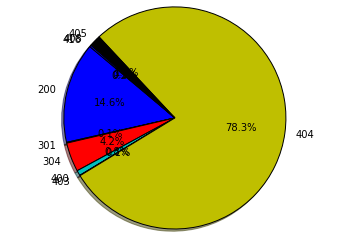

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## export the sql result into a local excel file

In [5]:
import xlwt

book = xlwt.Workbook(encoding="utf-8")
sheet = book.add_sheet("from odps")

with t.open_reader() as reader:
    y = 0
    for r in reader.read():
        x = 0
        for v in r.values:
            sheet.write(y, x, v)
            x = x + 1
        y = y + 1
        
book.save("from_odps.xls")